In [58]:
import glob
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'

import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preview'] = True
plt.rc('font', family='serif', serif=['Times'])
import warnings
warnings.filterwarnings("ignore")

In [2]:
model2name = {
    "m3p": "M$^3$P",
    "uc2": "UC$^2$",
    "ctrl_muniter": "mUNITER",
    "ctrl_xuniter": "xUNITER",
    "ctrl_lxmert": "LXMERT",
    "ctrl_uniter": "UNITER",
    "ctrl_vilbert": "ViLBERT",
    "ctrl_visualbert": "VisualBERT",
    "ctrl_vl-bert": "VL-BERT",
}

In [3]:
lang2name = {
    'en': 'ENG',
    'ar': 'ARB',
    'be': 'BEL',
    'bg': 'BUL',
    'da': 'DAN',
    'et': 'EST',
    'de': 'DEU',
    'el': 'ELL',
    'fr': 'FRA',
    'id': 'IND',
    'ja': 'JPN',
    'ko': 'KOR',
    'zh': 'CMN',
    'pt': 'POR',
    'ru': 'RUS',
    'es': 'SPA',
    'sw': 'SWA',
    'ta': 'TAM',
    'tr': 'TUR',
    'vi': 'VIE',
}

## English

In [4]:
model2ens = defaultdict(list)


for dset in ['XVNLI', 'xGQA', 'MaRVL']:
    dset_0 = pd.read_csv(f"{dset.lower()}/{dset}_0.csv")
    model2avg = dset_0[['model','en']]
    for m, avg in model2avg.values:
        model2ens[m].append(avg)
        
for dset in ['xFlickrCO', 'WIT']:
    dset_0 = pd.read_csv(f"{dset.lower()}/{dset}_ir_0.csv")
    model2avg = dset_0[['model','en']]
    for m, avg in model2avg.values:
        model2ens[m].append(avg)
    dset_0 = pd.read_csv(f"{dset.lower()}/{dset}_tr_0.csv")
    model2avg = dset_0[['model','en']]
    for m, avg in model2avg.values:
        model2ens[m].append(avg)

for m, l in model2ens.items():
    print(model2name[m], end=' ')
    for v in l:
        print('& %.2f' % v, end=' ')
    print('\\\\')

mUNITER & 76.38 & 54.68 & 71.91 & 44.50 & 40.90 & 19.90 & 22.34 \\
xUNITER & 75.77 & 54.83 & 71.55 & 38.45 & 32.05 & 16.70 & 18.54 \\
UC$^2$ & 76.38 & 55.19 & 70.56 & 37.40 & 34.55 & 17.90 & 19.71 \\
M$^3$P & 76.89 & 53.75 & 68.22 & 31.35 & 24.60 & 15.50 & 15.33 \\
LXMERT & 76.72 & 53.04 & 68.95 & 36.85 & 29.60 & 18.00 & 18.50 \\
UNITER & 77.15 & 55.59 & 71.11 & 43.05 & 40.70 & 18.10 & 19.00 \\
ViLBERT & 77.15 & 55.82 & 71.02 & 38.70 & 35.70 & 17.90 & 20.20 \\
VisualBERT & 77.15 & 53.67 & 71.18 & 43.95 & 39.85 & 18.30 & 20.50 \\
VL-BERT & 77.49 & 55.74 & 71.72 & 39.90 & 34.15 & 20.10 & 21.17 \\


## Zero-shot

In [5]:
model2avgs = defaultdict(list)


for dset in ['XVNLI', 'xGQA', 'MaRVL']:
    dset_0 = pd.read_csv(f"{dset.lower()}/{dset}_0.csv")[:4]
    model2avg = dset_0[['model','avg']]
    for m, avg in model2avg.values:
        model2avgs[m].append(avg)
        
for dset in ['xFlickrCO', 'WIT']:
    dset_0 = pd.read_csv(f"{dset.lower()}/{dset}_ir_0.csv")[:4]
    model2avg = dset_0[['model','avg']]
    for m, avg in model2avg.values:
        model2avgs[m].append(avg)
    dset_0 = pd.read_csv(f"{dset.lower()}/{dset}_tr_0.csv")[:4]
    model2avg = dset_0[['model','avg']]
    for m, avg in model2avg.values:
        model2avgs[m].append(avg)

for m, l in model2avgs.items():
    print(model2name[m], end=' ')
    for v in l:
        print('& %.2f' % v, end=' ')
    print('\\\\')

mUNITER & 53.69 & 9.97 & 53.72 & 8.06 & 8.86 & 9.16 & 10.48 \\
xUNITER & 58.48 & 21.72 & 54.59 & 14.04 & 13.51 & 8.72 & 9.81 \\
UC$^2$ & 62.05 & 29.35 & 57.28 & 20.31 & 17.89 & 7.83 & 9.09 \\
M$^3$P & 58.25 & 28.17 & 56.00 & 12.91 & 11.90 & 8.12 & 9.98 \\


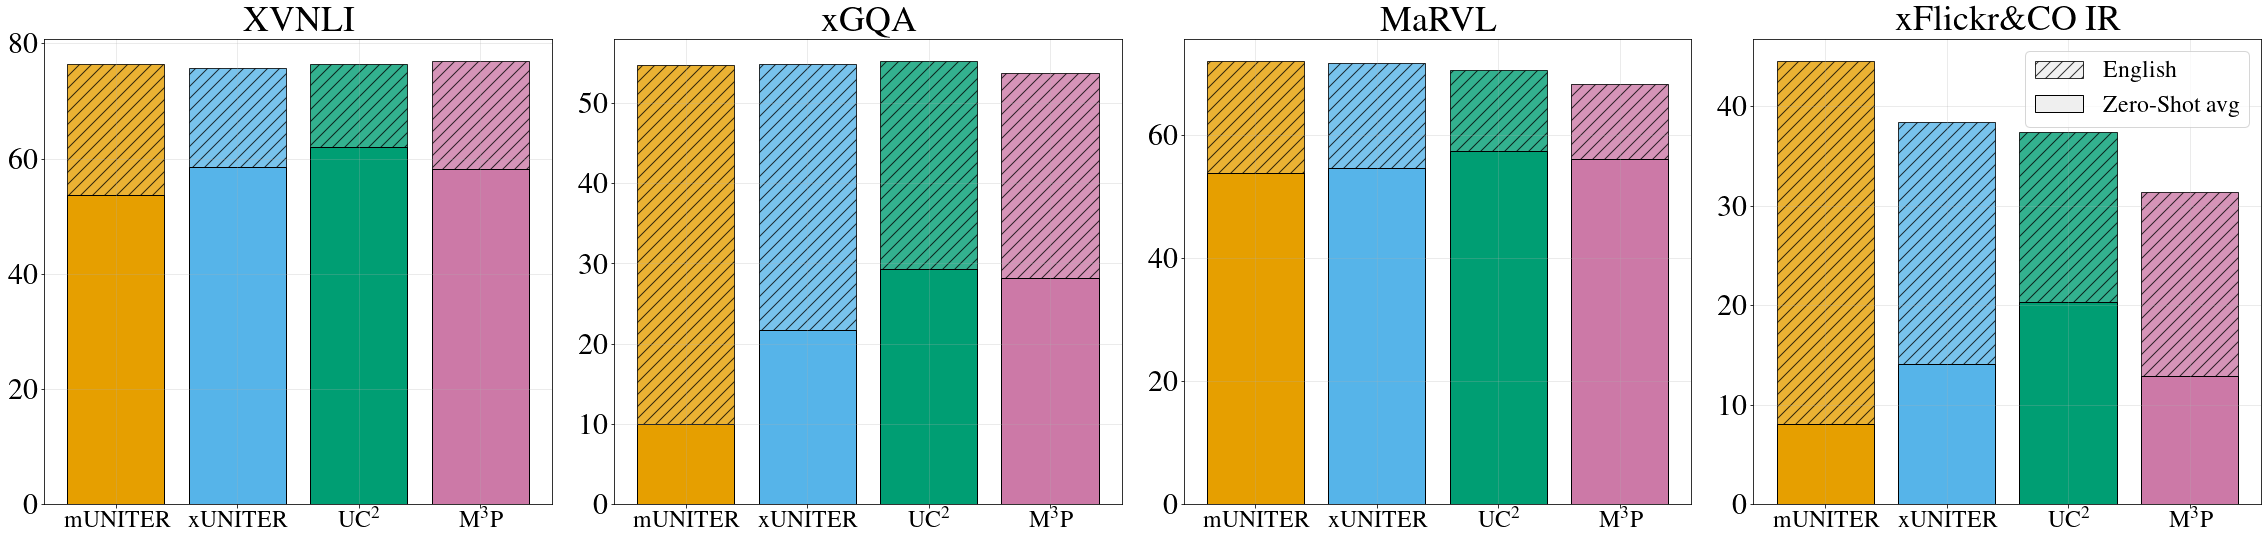

In [54]:
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'

colors = ['#000000', '#E69F00', '#56B4E9', '#009E73', '#CC79A7']
markers = ['X', 's', '^', 'o', 'd']

f, axs = plt.subplots(1, 4, figsize=(32,8))

for ix, dset in enumerate(['XVNLI', 'xGQA', 'MaRVL', 'xFlickrCO']):
    for im, m in enumerate(model2avgs.keys()):
        axs[ix].bar(im, model2ens[m][ix], color=colors[im+1], edgecolor='black', hatch='//', alpha=0.8)
        axs[ix].bar(im, model2avgs[m][ix], color=colors[im+1], edgecolor='black')
    axs[ix].tick_params(axis='both', which='major', labelsize=30)
    axs[ix].set_xticks([x for x in range(len(model2avgs))])
    axs[ix].set_xticklabels([model2name[m] for m in model2avgs.keys()], fontsize=24)
    axs[ix].set_title(dset, fontsize=36)
    axs[ix].grid(alpha=0.3)
axs[-1].set_title('xFlickr\&CO IR', fontsize=36)


import matplotlib.patches as mpatches
patch1 = mpatches.Patch(facecolor="#efefef", edgecolor='black', hatch='//', alpha=0.8)
patch2 = mpatches.Patch(facecolor="#efefef", edgecolor='black')
axs[-1].legend(handles=[patch1, patch2], labels=['English', 'Zero-Shot avg'], ncol=1, fontsize=24)

f.tight_layout(pad=2.5)
f.savefig("zeroshot_gap.jpg", bbox_inches='tight')

In [7]:
model2avgs = defaultdict(list)


for dset in ['XVNLI', 'xGQA', 'MaRVL']:
    dset_0 = pd.read_csv(f"{dset.lower()}/{dset}_0.mt.csv")
    model2avg = dset_0[['model','avg']]
    for m, avg in model2avg.values:
        model2avgs[m].append(avg)
        
for dset in ['xFlickrCO', 'WIT']:
    dset_0 = pd.read_csv(f"{dset.lower()}/{dset}_ir_0.mt.csv")
    model2avg = dset_0[['model','avg']]
    for m, avg in model2avg.values:
        model2avgs[m].append(avg)
    dset_0 = pd.read_csv(f"{dset.lower()}/{dset}_tr_0.mt.csv")
    model2avg = dset_0[['model','avg']]
    for m, avg in model2avg.values:
        model2avgs[m].append(avg)

for m, l in model2avgs.items():
    print(model2name[m], end=' ')
    for v in l:
        print('& %.2f' % v, end=' ')
    print('\\\\')

mUNITER & 73.09 & 49.05 & 63.82 & 40.95 & 36.78 & 16.25 & 16.64 \\
xUNITER & 72.83 & 49.15 & 64.04 & 36.26 & 30.29 & 13.01 & 14.20 \\
UC$^2$ & 73.67 & 50.19 & 63.09 & 36.03 & 30.37 & 12.70 & 14.11 \\
M$^3$P & 73.37 & 48.83 & 62.52 & 27.74 & 21.29 & 11.53 & 13.63 \\
LXMERT & 72.57 & 48.08 & 62.51 & 34.02 & 26.66 & 14.28 & 14.86 \\
UNITER & 73.65 & 50.62 & 61.92 & 41.04 & 37.49 & 15.43 & 16.01 \\
ViLBERT & 73.45 & 50.33 & 62.39 & 36.97 & 33.21 & 15.40 & 16.93 \\
VisualBERT & 74.12 & 48.72 & 62.35 & 41.64 & 36.44 & 15.36 & 15.75 \\
VL-BERT & 73.86 & 49.78 & 64.16 & 38.18 & 31.84 & 15.11 & 16.09 \\


# Few-shot

In [55]:
model2avgs = defaultdict(list)
shots = []

for dset in ['XVNLI', 'xGQA']:
    dset_0 = pd.read_csv(f"{dset.lower()}/{dset}_0.csv")[:4]
    model2avg = dset_0[['model','avg']]
    for m, avg in model2avg.values:
        model2avgs[m].append([avg])
    shots.append([0])
    for s in [1,5,10,20,25,48]:
        shots[-1].append(s)
        dset_0 = pd.read_csv(f"{dset.lower()}/{dset}_{s}.None.csv")
        model2avg = dset_0[['model','avg']]
        for m, avg in model2avg.values:
            model2avgs[m][-1].append(avg)

dset = "MaRVL"
dset_0 = pd.read_csv(f"{dset.lower()}/{dset}_0.id_tr_zh.csv")[:4]
model2avg = dset_0[['model','avg']]
for m, avg in model2avg.values:
    model2avgs[m].append([avg])
shots.append([0])
for s in [4,8,16,40,80]:
    shots[-1].append(s)
    dset_0 = pd.read_csv(f"{dset.lower()}/{dset}_{s}.None.csv")
    model2avg = dset_0[['model','avg']]
    for m, avg in model2avg.values:
        model2avgs[m][-1].append(avg)
        
dset = "xFlickrCO"
dset_0 = pd.read_csv(f"{dset.lower()}/{dset}_ir_0.csv")[:4]
model2avg = dset_0[['model','avg']]
for m, avg in model2avg.values:
    model2avgs[m].append([avg])
shots.append([0])
for s in [1,5,10,25,50,100]:
    shots[-1].append(s)
    dset_0 = pd.read_csv(f"{dset.lower()}/{dset}_ir_{s}.None.csv")
    model2avg = dset_0[['model','avg']]
    for m, avg in model2avg.values:
        model2avgs[m][-1].append(avg)  
    
dset_0 = pd.read_csv(f"{dset.lower()}/{dset}_tr_0.csv")[:4]
model2avg = dset_0[['model','avg']]
for m, avg in model2avg.values:
    model2avgs[m].append([avg])
shots.append([0])
for s in [1,5,10,25,50,100]:
    shots[-1].append(s)
    dset_0 = pd.read_csv(f"{dset.lower()}/{dset}_tr_{s}.None.csv")
    model2avg = dset_0[['model','avg']]
    for m, avg in model2avg.values:
        model2avgs[m][-1].append(avg)

In [61]:
task_shots = [
    [1,5,10,20,25,48],
    [1,5,10,20,25,48],
    [4,8,16,40,80],
    [1,5,10,25,50,100],
    [1,5,10,25,50,100],
]

task_labels = [
    [0, 3,18,39,75,90,168],
    [0, 27,155,317,594,704,1490],
    [0, 4,8,16,40,80],
    [0, 1,5,10,25,50,100],
    [0, 1,5,10,25,50,100],
]

### AUC

In [62]:
# AUC (simple trapezoidal rule)
# [https://stackoverflow.com/questions/22238489/python-integrating-area-under-curve-with-uneven-steps-in-x]
for m, l in model2avgs.items():
    print(model2name[m], end=' ')
    for ix, ys in enumerate(l):
        xs = np.array(task_labels[ix])
        ys = np.array(ys)
        s = np.sum((xs[1:] - xs[:-1]) * (ys[1:] + ys[:-1]) / 2)
        o = 100 * xs[-1]
        print('& %.2f' % (100*s/o), end=' ')
    print('\\\\')

mUNITER & 54.10 & 33.67 & 54.68 & 8.36 & 8.89 \\
xUNITER & 59.78 & 38.10 & 56.82 & 14.05 & 13.51 \\
UC$^2$ & 63.43 & 40.43 & 57.11 & 19.24 & 17.31 \\
M$^3$P & 59.07 & 38.89 & 49.96 & 12.90 & 12.07 \\


### Most-shot

In [63]:
# Most-shot accuracy
for m, l in model2avgs.items():
    print(model2name[m], end=' ')
    for ix, ys in enumerate(l):
        print('& %.2f' % ys[-1], end=' ')
    print('\\\\')

mUNITER & 53.95 & 37.21 & 53.41 & 8.54 & 9.32 \\
xUNITER & 60.55 & 40.68 & 57.46 & 14.30 & 13.54 \\
UC$^2$ & 63.68 & 42.95 & 58.32 & 19.79 & 17.59 \\
M$^3$P & 59.36 & 41.04 & 49.79 & 13.21 & 12.26 \\


### Curves

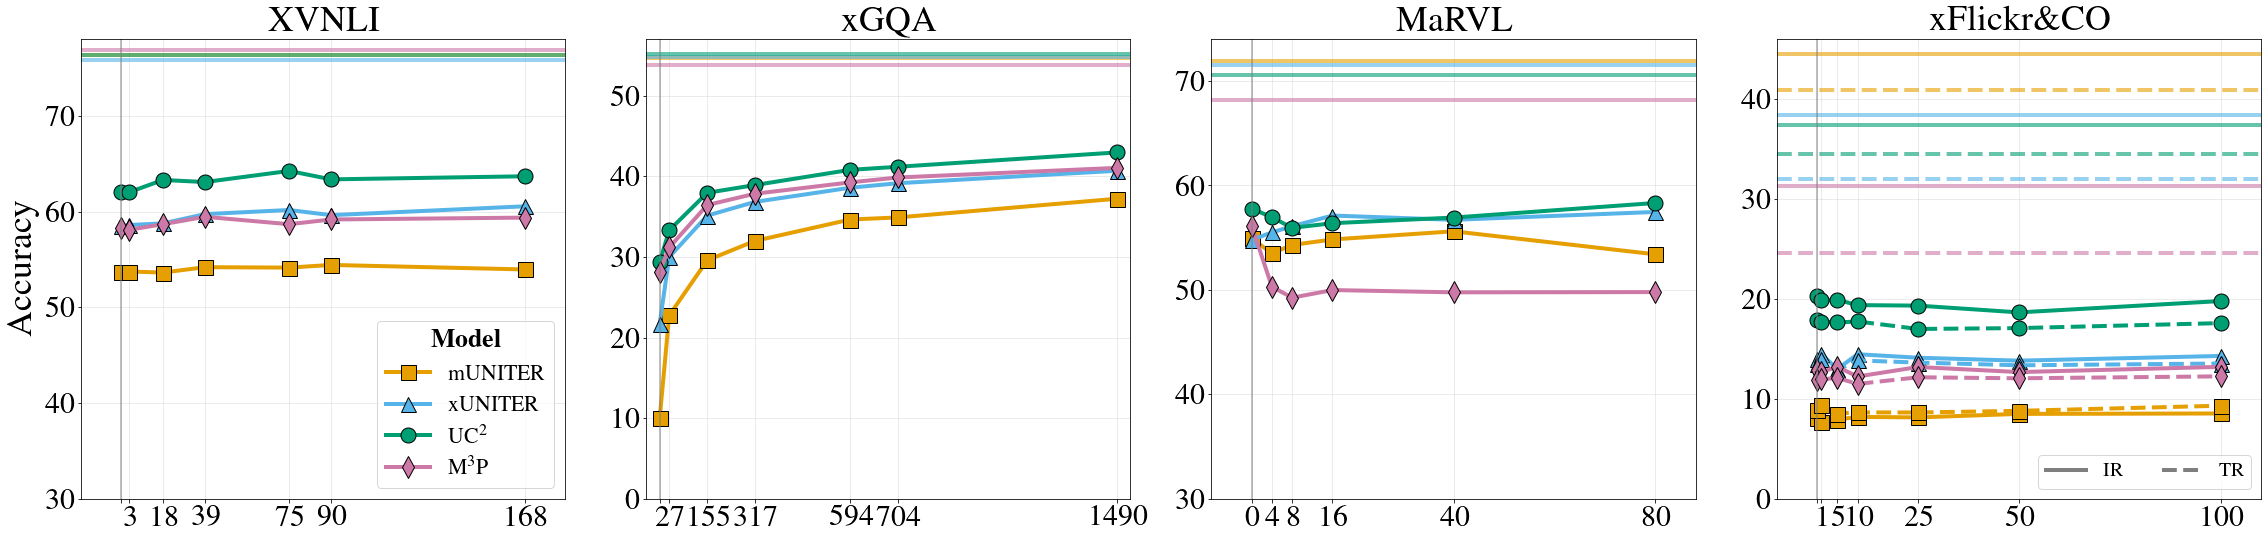

In [66]:
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'

colors = ['#000000', '#E69F00', '#56B4E9', '#009E73', '#CC79A7']
markers = ['X', 's', '^', 'o', 'd']

f, axs = plt.subplots(1,4, figsize=(32,8))

im = 1
for m, l in model2avgs.items():
    for ix, ys in enumerate(l):
        xs = np.array(shots[ix])
        ys = np.array(ys)
        if ix == 4:
            axs[ix-1].plot(xs, ys, '--', marker=markers[im], markersize=15, linewidth=4, markeredgecolor='k', color=colors[im])
        else:
            axs[ix].plot(xs, ys, label=model2name[m], marker=markers[im], markersize=15, linewidth=4, markeredgecolor='k', color=colors[im])
    im += 1
    
im = 1
for m in model2avgs.keys():
    l = model2ens[m]
    for ix, y in enumerate(l[:-2]):
        if ix == 4:
            axs[ix-1].axhline(y, linestyle='--', linewidth=4, color=colors[im], alpha=0.6)
        else:
            axs[ix].axhline(y, linestyle='-', linewidth=4, color=colors[im], alpha=0.6)
    im += 1
    
for ax in axs:
    ax.axvline(0, linestyle='-', linewidth=2, color='gray', alpha=0.5)

axs[0].set_title('XVNLI', fontsize=36)
axs[0].set_ylim(30,78)
axs[0].set_ylabel('Accuracy', fontsize=36)
axs[1].set_title('xGQA', fontsize=36)
axs[1].set_ylim(0,57)
axs[2].set_title('MaRVL', fontsize=36)
axs[2].set_ylim(30,74)
axs[3].set_title('xFlickr\&CO', fontsize=36)
axs[3].set_ylim(0, 46)
for ix, ax in enumerate(axs):
    ax.grid(alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.set_xticks([0] + task_shots[ix])
    ax.set_xticklabels([''] + task_labels[ix])
    if ix == 2:
        ax.set_xticklabels([0] + task_labels[ix])
    ax.margins(x=0.1)
axs[1].margins(x=0.03)

axs[0].legend(loc='lower right', title='\\textbf{Model}', title_fontsize=26, fontsize=22)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=colors[0], alpha=0.5, lw=4),
                Line2D([0], [0], linestyle='--', color=colors[0], alpha=0.5, lw=4)]
axs[-1].legend(custom_lines, ['IR', 'TR'], loc='lower right', ncol=2, fontsize=20)

f.tight_layout(pad=2.5)
f.savefig("fewshot_curves_avg.pdf", bbox_inches='tight')